In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir('E:\DataScience\datasets\SCMA2023')

In [3]:
nss = pd.read_csv('NSSO68.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
list(nss)

['Unnamed: 0',
 'grp',
 'Round_Centre',
 'FSU_number',
 'Round',
 'Schedule_Number',
 'Sample',
 'Sector',
 'state',
 'State_Region',
 'District',
 'Stratum_Number',
 'Sub_Stratum',
 'Schedule_type',
 'Sub_Round',
 'Sub_Sample',
 'FOD_Sub_Region',
 'Hamlet_Group_Sub_Block',
 'Second',
 'X_Stage_Stratum',
 'HHS_No',
 'Level',
 'Filler',
 'hhdsz',
 'NIC_2008',
 'NCO_2004',
 'HH_type',
 'Religion',
 'Social_Group',
 'Whether_owns_any_land',
 'Type_of_land_owned',
 'Land_Owned',
 'Land_Leased_in',
 'Otherwise_possessed',
 'Land_Leased_out',
 'Land_Total_possessed',
 'During_July_June_Cultivated',
 'During_July_June_Irrigated',
 'NSS',
 'NSC',
 'MLT',
 'land_tt',
 'Cooking_code',
 'Lighting_code',
 'Dwelling_unit_code',
 'Regular_salary_earner',
 'Perform_Ceremony',
 'Meals_seved_to_non_hhld_members',
 'Possess_ration_card',
 'Type_of_ration_card',
 'MPCE_URP',
 'MPCE_MRP',
 'Person_Srl_No',
 'Relation',
 'Sex',
 'Age',
 'Marital_Status',
 'Education',
 'Days_Stayed_away',
 'No_of_Meals_per

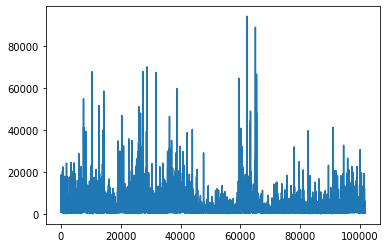

In [5]:
plt.plot(nss['MPCE_MRP']);

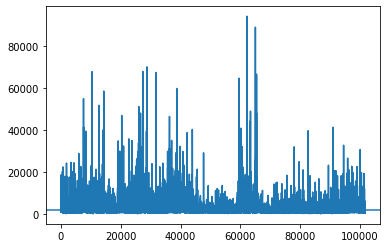

In [6]:
plt.plot(nss['MPCE_MRP']);
plt.axhline(nss['MPCE_MRP'].mean());

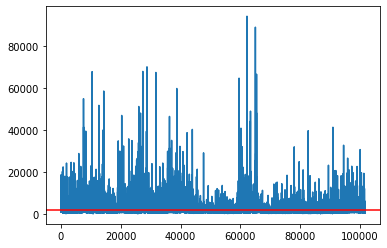

In [7]:
plt.plot(nss['MPCE_MRP']);
plt.axhline(nss['MPCE_MRP'].mean(), color='r');

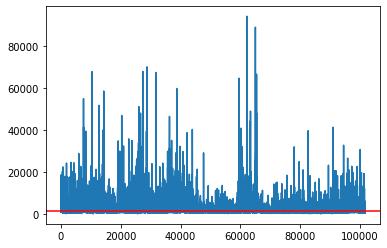

In [8]:
plt.plot(nss['MPCE_MRP']);
plt.axhline(nss['MPCE_MRP'].median(), color='r');

In [10]:
print('Median Expenditure', nss['MPCE_MRP'].median())
print('Mean Expenditure', nss['MPCE_MRP'].mean())

Median Expenditure 1533.87
Mean Expenditure 2078.751228974444


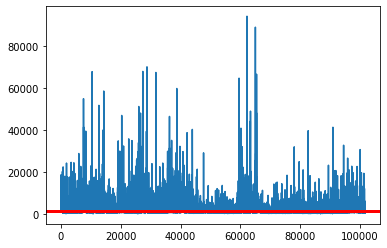

In [11]:
plt.plot(nss['MPCE_MRP']);
plt.axhline(nss['MPCE_MRP'].median(), color='r', lw=3);

In [12]:
nss[nss['MPCE_MRP'] > 60000].index

Int64Index([10463, 27401, 28788, 31756, 59539, 62189, 64995, 65231, 65382], dtype='int64')

In [13]:
nss.drop(nss[nss['MPCE_MRP'] > 60000].index, inplace=True)

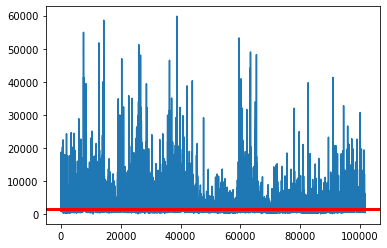

In [14]:
plt.plot(nss['MPCE_MRP']);
plt.axhline(nss['MPCE_MRP'].median(), color='r', lw=3);

In [16]:
nss['MPCE_MRP'].describe()

count    101653.000000
mean       2072.529763
std        1999.159549
min          44.110000
25%        1054.240000
50%        1533.760000
75%        2400.960000
max       59818.320000
Name: MPCE_MRP, dtype: float64

In [ ]:
Very_low : < 1000
low: 1000 - 2000
medium: 2000 - 25,000
high: > 25,000

In [17]:
def bucket (x):
    if x < 1000:
        return 'Very Low'
    if x < 2000:
        return 'Low'
    if x < 25000:
        return 'Medium'
    else:
        return 'High'

In [18]:
nss['Income_cat']  = nss['MPCE_MRP'].apply(bucket)

In [19]:
nss['Income_cat'].value_counts()

Low         45048
Medium      34348
Very Low    22181
High           76
Name: Income_cat, dtype: int64

In [20]:
income = pd.DataFrame(nss['Income_cat'].value_counts())

In [21]:
income

,Income_cat
Low,45048
Medium,34348
Very Low,22181
High,76


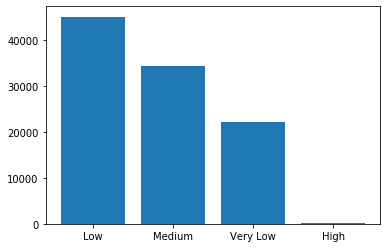

In [23]:
plt.bar(income.index, income.Income_cat);

### To visualise the no. of households below and above mean expenditure

In [24]:
nss['MPCE_MRP'].mean()

2072.52976291895

In [26]:
def bucket1(x):
    if x < 2072:
        return 'Below Mean'
    else:
        return 'Above Mean'
nss['income_cat2'] = nss['MPCE_MRP'].apply(bucket1)

In [27]:
nss['income_cat2'].value_counts()

Below Mean    69093
Above Mean    32560
Name: income_cat2, dtype: int64

In [28]:
income2 = pd.DataFrame(nss['income_cat2'].value_counts())

In [29]:
income2

,income_cat2
Below Mean,69093
Above Mean,32560


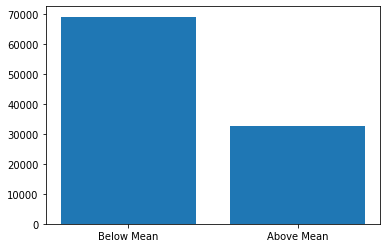

In [32]:
plt.bar(income2.index, income2.income_cat2);

### Plot the expenditure across different religion

In [33]:
def recodes (val):
    if val ==1:
        return 'Hindu'
    elif val ==2:
        return 'Islam'
    elif val == 3:
        return 'Christ'
    elif val == 4:
        return 'Sikh'
    elif val == 5:
        return 'Jain'
    elif val == 6:
        return 'Budh'
    else:
        return 'Others'

In [34]:
nss['Rel_Cat'] = nss['Religion'].apply(recodes)

In [36]:
nss.groupby('Rel_Cat')[['MPCE_MRP']].mean()

,MPCE_MRP
Rel_Cat,
Budh,2045.805494
Christ,2350.326218
Hindu,2066.479048
Islam,1806.591609
Jain,3581.442826
Others,1993.412997
Sikh,2873.630903


In [37]:
income_R =  nss.groupby('Rel_Cat')[['MPCE_MRP']].mean()

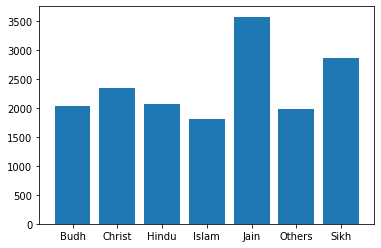

In [38]:
plt.bar(income_R.index, income_R.MPCE_MRP);

In [39]:
income_R.sort_values('MPCE_MRP', inplace=True)

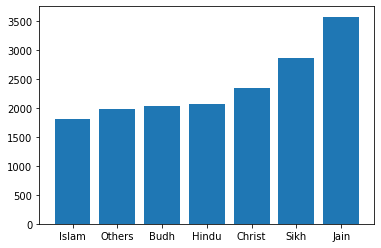

In [40]:
plt.bar(income_R.index, income_R.MPCE_MRP);

In [43]:
def bucket3(val):
    if val == 1:
        return 'Male'
    else: 
        return 'Female'

In [44]:
nss['Gender'] = nss['Sex'].apply(bucket3)

In [45]:
nss['Gender'].value_counts()

Male      89899
Female    11754
Name: Gender, dtype: int64

In [46]:
nss.groupby(['Rel_Cat','Gender'])[['MPCE_MRP']].mean()

MPCE_MRP
Rel_Cat Gender             
Budh    Female  2377.783000
        Male    2004.904774
Christ  Female  2862.555005
        Male    2273.962408
Hindu   Female  2163.516064
        Male    2053.976806
Islam   Female  1958.344105
        Male    1786.078134
Jain    Female  3161.942400
        Male    3616.754310
Others  Female  2201.591500
        Male    1963.708573
Sikh    Female  2991.586620
        Male    2859.696034

In [51]:
income_RG = pd.pivot_table(data=nss, values='MPCE_MRP', index='Rel_Cat',columns='Gender', aggfunc='mean')

In [52]:
income_RG.head()

Gender,Female,Male
Rel_Cat,,
Budh,2377.783000,2004.904774
Christ,2862.555005,2273.962408
Hindu,2163.516064,2053.976806
Islam,1958.344105,1786.078134
Jain,3161.942400,3616.754310


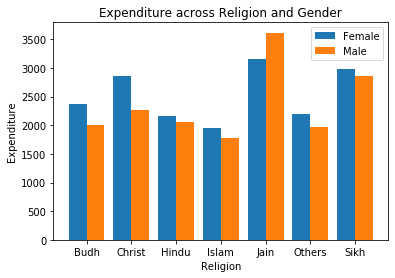

In [62]:
x_axis = np.arange(len(income_RG.index))
plt.bar(x_axis -0.2, income_RG.Female, 0.4, label='Female');
plt.bar(x_axis +0.2, income_RG.Male, 0.4, label='Male');
plt.xticks(x_axis, income_RG.index);
plt.title('Expenditure across Religion and Gender');
plt.xlabel('Religion')
plt.ylabel('Expenditure')
plt.legend();

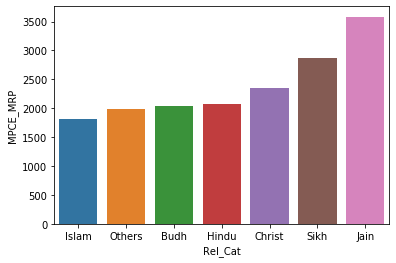

In [64]:
sns.barplot(income_R.index, income_R.MPCE_MRP);

In [66]:
incomeR1 = nss.groupby(['Rel_Cat','Gender'])[['MPCE_MRP']].mean()

In [68]:
incomeR1.reset_index(inplace=True)

In [70]:
incomeR1.head(2)

,Rel_Cat,Gender,MPCE_MRP
0,Budh,Female,2377.783000
1,Budh,Male,2004.904774


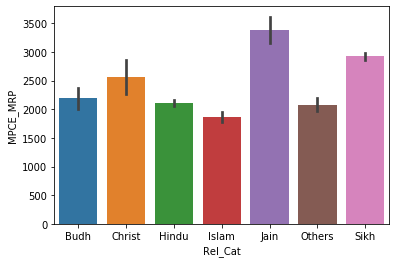

In [72]:
sns.barplot(incomeR1.Rel_Cat, incomeR1.MPCE_MRP);

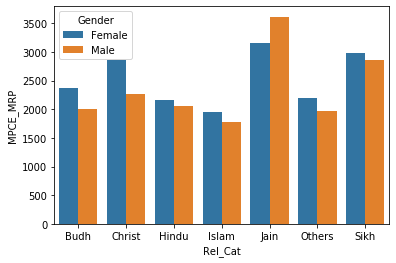

In [73]:
sns.barplot(incomeR1.Rel_Cat, incomeR1.MPCE_MRP, hue=incomeR1.Gender);

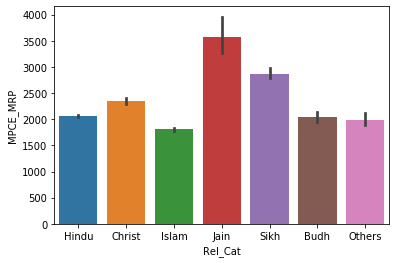

In [75]:
sns.barplot(data=nss, x='Rel_Cat', y='MPCE_MRP', estimator = np.mean);

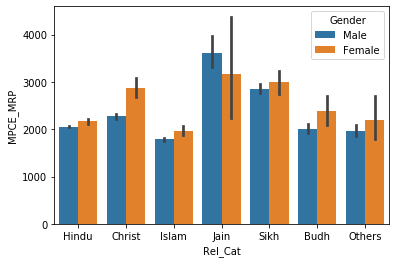

In [76]:
sns.barplot(data=nss, x='Rel_Cat', y='MPCE_MRP',hue='Gender', estimator = np.mean);

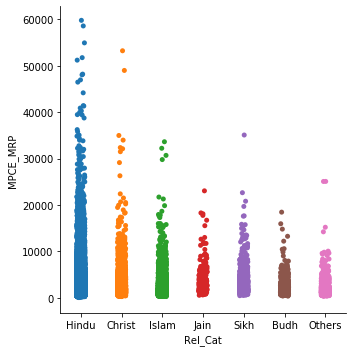

In [78]:
sns.catplot(data=nss,x='Rel_Cat', y='MPCE_MRP' );

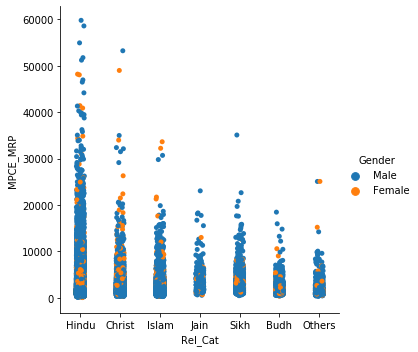

In [79]:
sns.catplot(data=nss,x='Rel_Cat', y='MPCE_MRP' , hue='Gender');

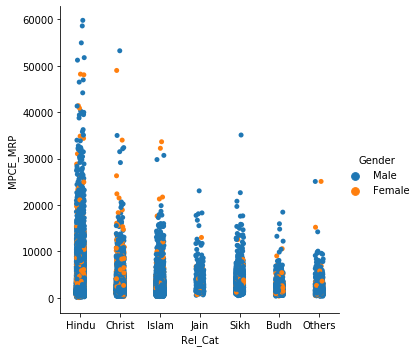

In [80]:
sns.catplot(data=nss,x='Rel_Cat', y='MPCE_MRP' , hue='Gender', estimator=np.median );